<a href="https://colab.research.google.com/github/youngeun1207/keras/blob/main/tmd_wheelchair/June_15sec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [8]:
train_data = np.load('/content/drive/MyDrive/TMD_data/train_15s_data.npy')
train_label = np.load('/content/drive/MyDrive/TMD_data/train_15s_label.npy')

val_data = np.load('/content/drive/MyDrive/TMD_data/valid_15s_data.npy')
val_label= np.load('/content/drive/MyDrive/TMD_data/valid_15s_label.npy')

In [9]:
print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

(7224, 900, 10)
(7224, 7)
(1505, 900, 10)
(1505, 7)


In [ ]:
# CRNN with 3층 GRU
# crnn_gru_3layers
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.GRU(128, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))
model_crnn.add(layers.GRU(32, dropout=0.3))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=500,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

48/48 [==============================] - 0s 9ms/step - loss: 1.5368 - accuracy: 0.6771


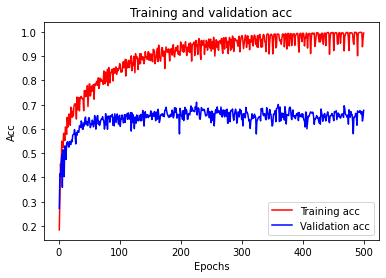

In [11]:
model_crnn.save('/content/drive/MyDrive/TmdJune/15sec/CRNN_GRU_3layers.h5')
model_crnn.evaluate(val_data, val_label)

# CRNN with 3층 GRU
# accuracy: 0.6771
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# CRNN cnn층 크게 
# crnn_gru_2layers
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(32, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(64, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.GRU(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
                   loss= 'categorical_crossentropy',
                   metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=1000,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

48/48 [==============================] - 0s 4ms/step - loss: 1.7229 - accuracy: 0.7017


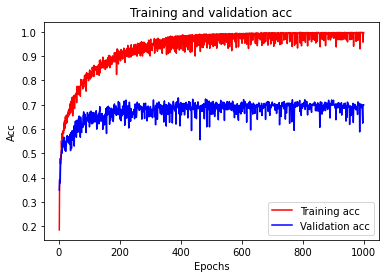

In [25]:
model_crnn.save('/content/drive/MyDrive/TmdJune/15sec/CRNN_GRU_2layers.h5')
model_crnn.evaluate(val_data, val_label)

# crnn_gru_2layers
# accuracy: 0.7017
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# CRNN LSTM lr 감소
# crnn_lstm_3layers
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',
                             input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.LSTM(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.LSTM(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.LSTM(64, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

rmsprop = tf.keras.optimizers.RMSprop(lr=0.0008)

model_crnn.compile(optimizer=rmsprop,
                   loss= 'categorical_crossentropy',
                   metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                    train_label,
                    epochs=1000,
                    batch_size=2048,
                    validation_data = (val_data, val_label),
                    verbose=2)

In [ ]:
model_crnn.save('/content/drive/MyDrive/TmdJune/15sec/CRNN_LSTM_3layers.h5')
model_crnn.evaluate(val_data, val_label)

# crnn_lstm_3layers
# accuracy: 
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# 3층 1D CNN
# 1Dcnn_3layers
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(32, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(64, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(7, activation='softmax'))

model_cnn.summary()

model_cnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(train_data,
                        train_label,
                        epochs=1000,
                        batch_size=2048,
                        verbose=2,
                        validation_data = (val_data, val_label))

In [ ]:
model_cnn.save('/content/drive/MyDrive/TmdJune/15sec/Conv1D.h5')
model_cnn.evaluate(val_data, val_label)

# 1Dcnn_3layers
# accuracy: 
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# 1D CNN 4층
# 1Dcnn_4layers
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(32, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(64, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(64, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(7, activation='softmax'))

model_cnn.summary()

model_cnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(train_data,
                        train_label,
                        epochs=1000,
                        batch_size=2048,
                        verbose=2,
                        validation_data = (val_data, val_label))

48/48 [==============================] - 0s 3ms/step - loss: 4.1127 - accuracy: 0.6518


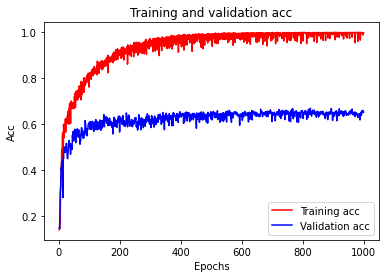

In [38]:
model_cnn.save('/content/drive/MyDrive/TmdJune/15sec/Conv1D_5layers.h5')
model_cnn.evaluate(val_data, val_label)

# 1Dcnn_4layers
# accuracy: 0.6518
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# CRNN with 5층 GRU
# crnn_gru_5layers
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(64, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))

model_crnn.add(layers.GRU(128, return_sequences = True))
model_crnn.add(layers.GRU(128, dropout=0.3, return_sequences = True))

model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))

model_crnn.add(layers.GRU(32, dropout=0.3))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=500,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

48/48 [==============================] - 0s 6ms/step - loss: 1.7639 - accuracy: 0.6611


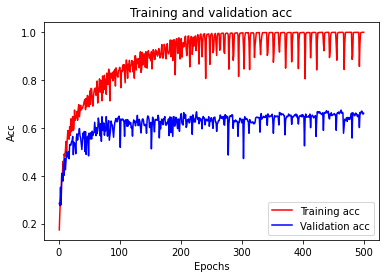

In [40]:
model_crnn.save('/content/drive/MyDrive/TmdJune/15sec/crnn_GRU_5layers.h5')
model_crnn.evaluate(val_data, val_label)

# crnn_gru_5layers
# accuracy: 
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# crnn_gru_best
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(32, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(32, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(64, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))

model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.GRU(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
                   loss= 'categorical_crossentropy',
                   metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=1000,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

48/48 [==============================] - 0s 5ms/step - loss: 1.8443 - accuracy: 0.7043


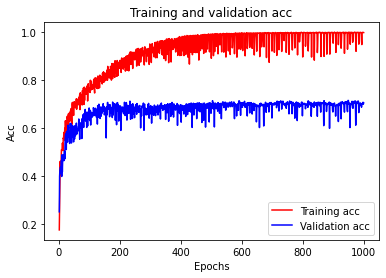

In [44]:
model_crnn.evaluate(val_data, val_label)

# crnn_gru_best
# accuracy: 0.7043
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [45]:
model_crnn.save('/content/drive/MyDrive/TmdJune/15sec/crnn_GRU_best.h5')